

# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [267]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import itertools

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [268]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [269]:
#fuente de pdatos
data_path = 'https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Capacidad_Asistencial_Historico_30032021.csv'
data_path_row = 'https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Capacidad_Asistencial_Historico_{}.csv'

img_path = '/Users/mharias/documents/proyectos/covid/sanidad_hospital/img/'
autor='@walyt'
escovid='@escovid19data'

In [270]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [271]:
hoy_string = datetime.today().strftime(format='%d %b')
hoy_string = datetime.today().strftime(format='%d%m%Y')

In [272]:
hoy_string

'02042021'

In [273]:
data_path = data_path_row.format(hoy_string)

In [274]:
data_path

'https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Capacidad_Asistencial_Historico_02042021.csv'

Leemos los datos en un `pandas`

In [275]:
df = pd.read_csv(data_path,encoding = "ISO-8859-1",sep=';')

HTTPError: HTTP Error 404: Not found

veamos una rápida descripción de la información:

In [276]:
df.tail()

,Fecha,Unidad,COD_CCAA,CCAA,Cod_Provincia,Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,OCUPADAS_NO_COVID19,porcentaje_total,porcentaje_covid
35095,2021-01-02,U. Críticas CON respirador,0.0,0,0.0,Palencia,0.0,0.0,0.0,0.0,0.0
35096,2021-01-02,U. Críticas SIN respirador,0.0,0,0.0,Palencia,0.0,0.0,0.0,0.0,0.0
35097,2021-01-03,Hospitalización convencional,0.0,0,0.0,Ceuta,0.0,0.0,0.0,0.0,0.0
35098,2021-01-03,U. Críticas CON respirador,0.0,0,0.0,Ceuta,0.0,0.0,0.0,0.0,0.0
35099,2021-01-03,U. Críticas SIN respirador,0.0,0,0.0,Ceuta,0.0,0.0,0.0,0.0,0.0


In [277]:
df['Fecha'].unique()

array(['2020-08-19T00:00:00.000000000', '2020-08-20T00:00:00.000000000',
       '2020-08-21T00:00:00.000000000', '2020-08-22T00:00:00.000000000',
       '2020-08-23T00:00:00.000000000', '2020-08-24T00:00:00.000000000',
       '2020-08-25T00:00:00.000000000', '2020-08-26T00:00:00.000000000',
       '2020-08-27T00:00:00.000000000', '2020-08-28T00:00:00.000000000',
       '2020-08-29T00:00:00.000000000', '2020-08-30T00:00:00.000000000',
       '2020-08-31T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-09-02T00:00:00.000000000', '2020-09-03T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2020-09-05T00:00:00.000000000',
       '2020-09-06T00:00:00.000000000', '2020-09-07T00:00:00.000000000',
       '2020-09-08T00:00:00.000000000', '2020-09-09T00:00:00.000000000',
       '2020-09-10T00:00:00.000000000', '2020-09-11T00:00:00.000000000',
       '2020-09-12T00:00:00.000000000', '2020-09-13T00:00:00.000000000',
       '2020-09-14T00:00:00.000000000', '2020-09-15

veamos las  columnas de interés:

In [278]:
df.columns

Index(['Fecha', 'Unidad', 'COD_CCAA', 'CCAA', 'Cod_Provincia', 'Provincia',
       'TOTAL_CAMAS', 'OCUPADAS_COVID19', 'OCUPADAS_NO_COVID19',
       'porcentaje_total', 'porcentaje_covid'],
      dtype='object')

In [279]:
df.Unidad.unique()

array(['Hospitalización convencional', 'U. Críticas CON respirador',
       'U. Críticas SIN respirador'], dtype=object)

In [280]:
df.CCAA.unique()

array(['ISLAS CANARIAS', 'EXTREMADURA', 'ANDALUCÍA', 'CASTILLA LA MANCHA',
       'NAVARRA', 'PAÍS VASCO', 'MELILLA', 'CASTILLA Y LEÓN', 'ARAGÓN',
       'GALICIA', 'CANTABRIA', 'CATALUÑA', 'COMUNIDAD VALENCIANA',
       'MURCIA', 'LA RIOJA', 'ASTURIAS', 'ISLAS BALEARES', 'MADRID',
       'CEUTA', 0], dtype=object)

Parece que es ok, no hay nombres duplicados (muy usual que cambie algún acento por ejemplo)

Convertimos la columna `fecha` en datetime

In [281]:
df['Fecha'] = pd.to_datetime(df['Fecha'],format='%Y-%m-%d')

y vamos añadir dos columnas adicionales `hola` : 
- `porcentaje_total`:  `OCUPADAS_COVID19`+`OCUPADAS_NO_COVID19` / `TOTAL_CAMAS` 
- `porcentaje_covid`: `OCUPADAS_COVID19`/ `TOTAL_CAMAS`

In [282]:
(df['Provincia']=='Madrid').any()

True

In [283]:
provincias = sorted(list(df['Provincia'].unique()))
provincias.insert(0,provincias.pop(-1))

In [284]:
fechas = df['Fecha'].unique()
unidades = df['Unidad'].unique()
for i in itertools.product(fechas,provincias,unidades):
    if ((df['Fecha']==i[0])&(df['Provincia']==i[1])&(df['Unidad']==i[2])).any():
        pass
    else:
        print (i)
        df=df.append({
            'Fecha':i[0],
            'Provincia':i[1],
            'Unidad':i[2],
            'TOTAL_CAMAS':np.NaN,
            'OCUPADAS_COVID19':np.NaN,
            'OCUPADAS_COVID19':np.NaN
        },
            ignore_index=True
        )

In [285]:
df.tail()

,Fecha,Unidad,COD_CCAA,CCAA,Cod_Provincia,Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,OCUPADAS_NO_COVID19,porcentaje_total,porcentaje_covid
35095,2021-01-02,U. Críticas CON respirador,0.0,0,0.0,Palencia,0.0,0.0,0.0,0.0,0.0
35096,2021-01-02,U. Críticas SIN respirador,0.0,0,0.0,Palencia,0.0,0.0,0.0,0.0,0.0
35097,2021-01-03,Hospitalización convencional,0.0,0,0.0,Ceuta,0.0,0.0,0.0,0.0,0.0
35098,2021-01-03,U. Críticas CON respirador,0.0,0,0.0,Ceuta,0.0,0.0,0.0,0.0,0.0
35099,2021-01-03,U. Críticas SIN respirador,0.0,0,0.0,Ceuta,0.0,0.0,0.0,0.0,0.0


In [286]:
df[df['Provincia']=='Palencia'].sort_values('Fecha')

,Fecha,Unidad,COD_CCAA,CCAA,Cod_Provincia,Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,OCUPADAS_NO_COVID19,porcentaje_total,porcentaje_covid
1284,2020-08-19,U. Críticas SIN respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,0.0,0.0,0.0,0.000000,0.000000
1280,2020-08-19,Hospitalización convencional,7.0,CASTILLA Y LEÓN,34.0,Palencia,331.0,6.0,252.0,77.945619,1.812689
1021,2020-08-19,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,14.0,0.0,12.0,85.714286,0.000000
332,2020-08-20,U. Críticas SIN respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,0.0,0.0,0.0,0.000000,0.000000
841,2020-08-20,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,14.0,0.0,11.0,78.571429,0.000000
586,2020-08-20,Hospitalización convencional,7.0,CASTILLA Y LEÓN,34.0,Palencia,329.0,5.0,263.0,81.458967,1.519757
1364,2020-08-21,U. Críticas SIN respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,0.0,0.0,0.0,0.000000,0.000000
846,2020-08-21,Hospitalización convencional,7.0,CASTILLA Y LEÓN,34.0,Palencia,329.0,4.0,238.0,73.556231,1.215805
1163,2020-08-21,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,14.0,0.0,10.0,71.428571,0.000000
856,2020-08-22,U. Críticas CON respirador,7.0,CASTILLA Y LEÓN,34.0,Palencia,14.0,0.0,10.0,71.428571,0.000000


In [287]:
df['porcentaje_total'] = 100*(df['OCUPADAS_COVID19']+df['OCUPADAS_NO_COVID19'])/df['TOTAL_CAMAS']
df['porcentaje_covid'] = 100*(df['OCUPADAS_COVID19'])/df['TOTAL_CAMAS']

In [288]:
df=df.fillna(0)

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

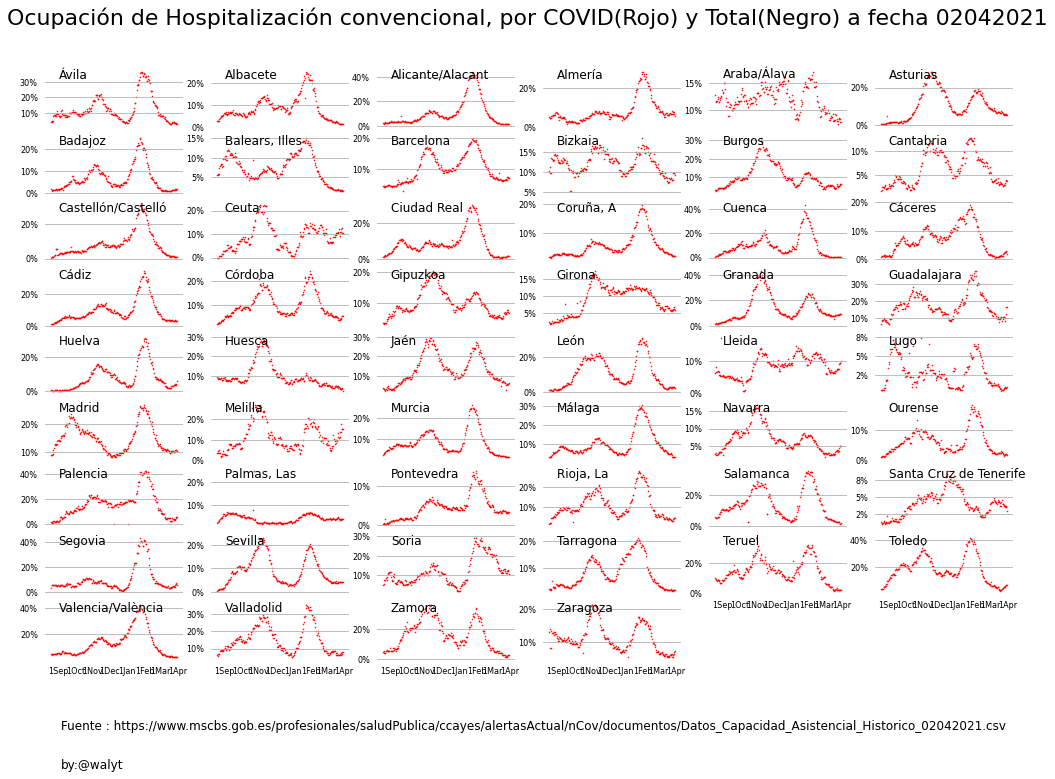

In [304]:

datos = df.copy()

sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(datos,col='Provincia',hue='Provincia',col_wrap=6,aspect=2, 
                      margin_titles=False,height=1.2,sharey=False,col_order=provincias)

# Título
unidad = 'Hospitalización convencional'
#unidad = 'U. Críticas CON respirador'
#unidad = 'U. Críticas SIN respirador'
titulo1 = 'Ocupación de {}, por COVID(Rojo) y Total(Negro) a fecha {}'.format(unidad,hoy_string)
titulo2 = 'Fuente : {}'.format(data_path)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'

XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    try:
        datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']==unidad)].sort_values('Fecha')
    except:
        pass
     
    
    #datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']=='U. Críticas CON respirador')].sort_values('Fecha')
        
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.1, .9, label, weight='normal',color=color_ejes,
            ha="left", va="center", size=12,transform=ax1.transAxes)
    #ax1.set_ylim(0,100)
    #ax1.set_yticks([0,25,50,75,100])
    
    ax1.yaxis.set_major_formatter(yticks)
    
    ax1.yaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='y',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    
    ax1.scatter(
        datos_['Fecha'],
        datos_['porcentaje_covid'],
        s=.3,
        color=color_covid)
                   
''' 
   ax1.scatter(
        datos_['Fecha'],
        datos_['porcentaje_total'],
        s=.3,
        color=color_total
    )
''' 
    
    
g.map(grafica,'Provincia')

g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
g.fig.text(x=0.05,y=.05,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.0,s='by:'+autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.9,bottom=.14,wspace=0.2,hspace=0.15)
#plt.tight_layout()
plt.savefig(img_path+unidad+'_provincias.png',dpi=288)  

plt.show()

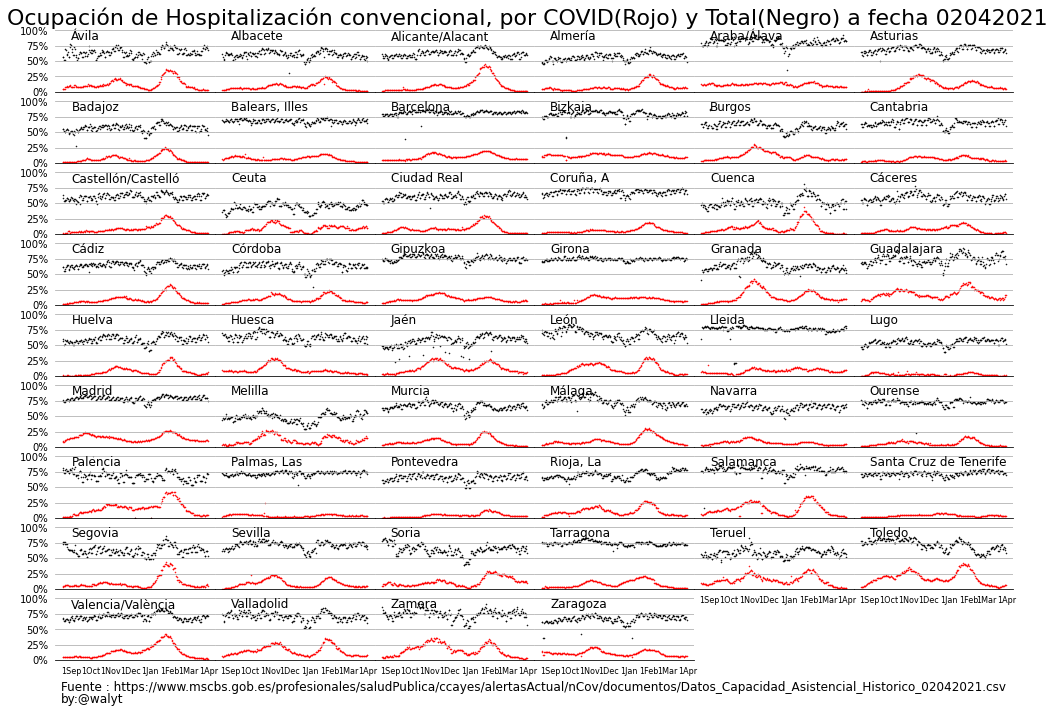

In [310]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(52, rot=-.25, light=.7)

datos = df.copy()

sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(datos,col='Provincia',hue='Provincia',col_wrap=6,aspect=2, 
                      margin_titles=False,height=1.2,sharey=True,col_order=provincias)

# Título
unidad = 'Hospitalización convencional'
#unidad = 'U. Críticas CON respirador'
#unidad = 'U. Críticas SIN respirador'
titulo1 = 'Ocupación de {}, por COVID(Rojo) y Total(Negro) a fecha {}'.format(unidad,hoy_string)
titulo2 = 'Fuente : {}'.format(data_path)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    try:
        datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']==unidad)].sort_values('Fecha')
    except:
        pass
     
    
    #datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']=='U. Críticas CON respirador')].sort_values('Fecha')
        
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.1, .9, label, weight='normal',color=color_ejes,
            ha="left", va="center", size=12,transform=ax1.transAxes)
    ax1.set_ylim(0,100)
    ax1.set_yticks([0,25,50,75,100])
    
    ax1.yaxis.set_major_formatter(yticks)
    
    ax1.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    #ax1.grid(True,axis='both',which='both')
    ax1.grid(True,axis='y',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    
    ax1.scatter(
        datos_['Fecha'],
        datos_['porcentaje_covid'],
        s=.3,
        color=color_covid)
                   
    ax1.scatter(
        datos_['Fecha'],
        datos_['porcentaje_total'],
        s=.3,
        color=color_total
    )
    
    
    #ax2.legend()
    
g.map(grafica,'Provincia')

#plt.legend()
g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=False, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
#g.fig.text(x=.4,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=18)
#g.fig.text(x=.4,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=18)
g.fig.text(x=0.05,y=.1,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.085,s='by:'+autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.95,bottom=.14,wspace=0.0,hspace=0.15)
#plt.tight_layout()
plt.savefig(img_path+unidad+'_provincias.png',dpi=288)  

plt.show()


# Graficos de UCI acumulados con respirador y sin respirador

In [262]:
datos2 = df.copy()

In [263]:
for i in itertools.product(fechas,provincias):
    
    
    
    camas_sin = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas SIN respirador')]['TOTAL_CAMAS'].values[0]
    camas_con = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas CON respirador')]['TOTAL_CAMAS'].values[0]
    ocupadas_covid_sin = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas SIN respirador')]['OCUPADAS_COVID19'].values[0]
    ocupadas_covid_con = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas CON respirador')]['OCUPADAS_COVID19'].values[0]
    ocupadas_no_covid_sin = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas SIN respirador')]['OCUPADAS_NO_COVID19'].values[0]
    ocupadas_no_covid_con = datos2.loc[(datos2['Fecha']==i[0])&(datos2['Provincia']==i[1])&(datos2['Unidad']==\
                                                'U. Críticas CON respirador')]['OCUPADAS_NO_COVID19'].values[0]
    datos2=datos2.append({
        'Fecha':i[0],
        'Provincia':i[1],
        'TOTAL_CAMAS':camas_sin+camas_con,
        'OCUPADAS_NO_COVID19':ocupadas_no_covid_sin+ocupadas_no_covid_con,
        'OCUPADAS_COVID19':ocupadas_covid_sin+ocupadas_covid_con,
        'Unidad':'U. Crítica Total'
        
    },ignore_index=True)

In [264]:
datos2['porcentaje_total'] = 100*(datos2['OCUPADAS_COVID19']+datos2['OCUPADAS_NO_COVID19'])/datos2['TOTAL_CAMAS']
datos2['porcentaje_covid'] = 100*datos2['OCUPADAS_COVID19']/datos2['TOTAL_CAMAS']
datos2=datos2.fillna(0)

In [305]:
datos3 = datos2[~datos2['Unidad'].isin(['U. Críticas CON respirador','U. Críticas SIN respirador'])]

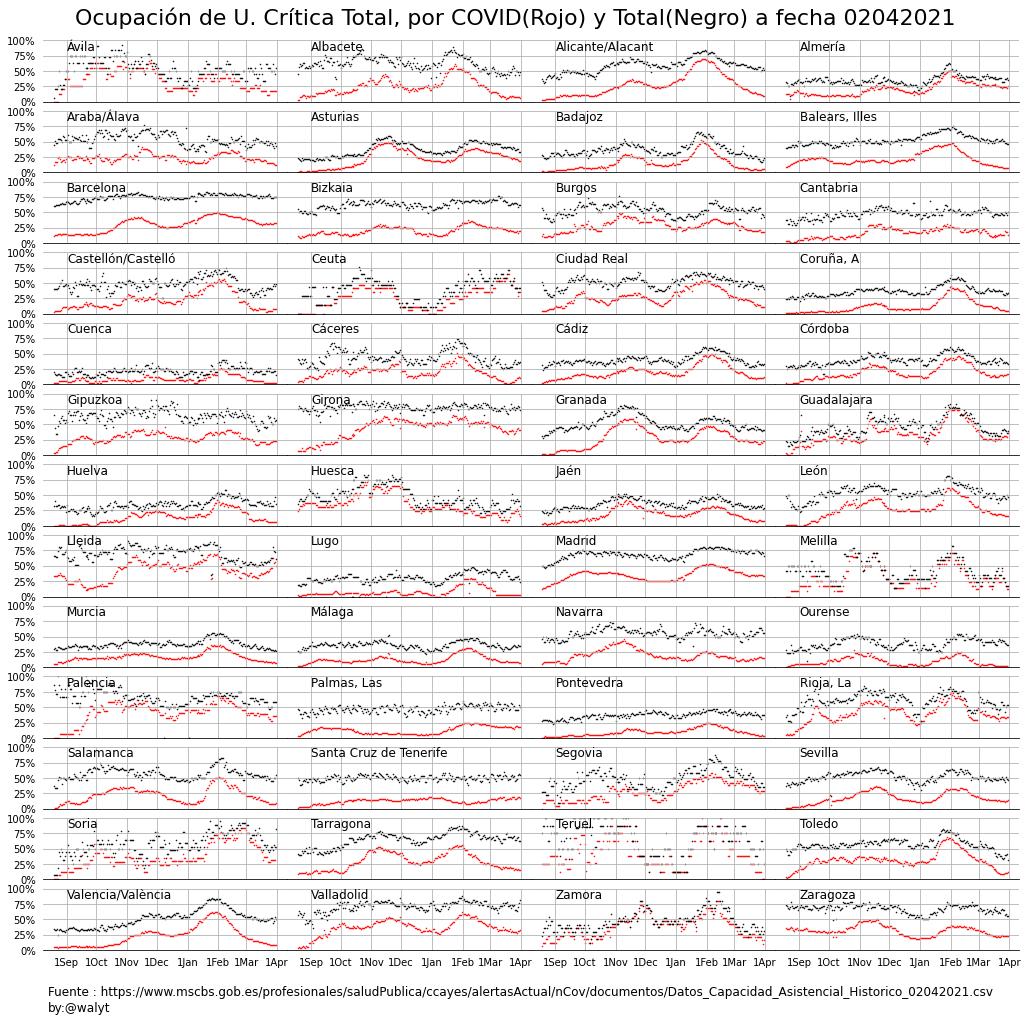

In [306]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(52, rot=-.25, light=.7)

#datos = df.copy()

sns.plotting_context('paper', font_scale = 1.3)
g = sns.FacetGrid(datos3,col='Provincia',hue='Provincia',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.2,sharey=True,col_order=provincias)

unidad = 'U. Crítica Total'
titulo1 = 'Ocupación de {}, por COVID(Rojo) y Total(Negro) a fecha {}'.format(unidad,hoy_string)
titulo2 = 'Fuente : {}'.format(data_path)
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    #ax1.xaxis_date()
    
    datos_ = datos3[(datos3['Provincia'] == label) & (datos3['Unidad']==unidad)].sort_values('Fecha')
    
    #datos_ = datos[(datos['Provincia'] == label) & (datos['Unidad']=='U. Críticas CON respirador')].sort_values('Fecha')
        
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.1, .9, label, weight='normal',color=color_ejes,
            ha="left", va="center", size=12,transform=ax1.transAxes)
    ax1.set_ylim(0,100)
    ax1.set_yticks([0,25,50,75,100])
    
    ax1.yaxis.set_major_formatter(yticks)
    
    ax1.yaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=10,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    #sns.lineplot(data=datos_,x='Fecha',y='porcentaje_covid',hue='Unidad',ax=ax1,ci=None,legend=False)
    
    ax1.scatter(
        datos_['Fecha'],
        datos_['porcentaje_covid'],
        s=.3,
        color=color_covid)
                   
    ax1.scatter(
        datos_['Fecha'],
        datos_['porcentaje_total'],
        s=.3,
        color=color_total
    )
    
    
    #ax2.legend()
    
g.map(grafica,'Provincia')

#plt.legend()
g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=False, left=True)
g.fig.suptitle('{}'.format(titulo1),fontsize=22,color=color_titulos)
#g.fig.text(x=.4,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=18)
#g.fig.text(x=.4,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=18)
g.fig.text(x=0.05,y=.1,s=titulo2,color=color_titulos,fontsize=12,ha='left')
g.fig.text(x=0.05,y=.085,s='by:'+autor,color=color_titulos,fontsize=12)
g.fig.subplots_adjust(top=.95,bottom=.14,wspace=0.0,hspace=0.15)
#plt.tight_layout()
plt.savefig(img_path+unidad+'_provincias.png',dpi=288)  

plt.show()
